In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [3]:
# here train.txt - training samples
# test.txt - test samples
# dev.txt - validation set

In [4]:
# start by using the 20k data set
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
# creating function to read the lines of a document
def get_lines(file_name):
  with open(file_name,"r") as f:
    return f.readlines()

In [6]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

**Pre Processing the text**

In [7]:
def preprocess_text(file_name):

  """
  [{"target": XYZ,
  "text" : data,
  "line_number" : 8,
  "total_lines" : 8}]
  """

  input_lines = get_lines(file_name)
  abstract_lines = ""
  abstract_samples = []

  # Loop throung each line in target file
  for line in input_lines:
    if(line.startswith("###")):
      abstract_id = line
      abstract_lines = ""

    elif(line.isspace()):
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [8]:
train_samples = preprocess_text(data_dir+"train.txt")
val_samples = preprocess_text(data_dir+"dev.txt")
test_samples = preprocess_text(data_dir+"test.txt")

In [9]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [10]:
# create data frame
import pandas as pd

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)

In [11]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [12]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

In [13]:
# convert text to numerical data using OneHotEncoder and LabelEncoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
# convert text data into integers using LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

In [16]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

**Model 0 Getting a baseline**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create a pipeline
model_0 = Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

train_text = train_df["text"]
train_label = train_labels_encoded

# fit the pipeline to the training data
model_0.fit(train_text,train_label)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [18]:
# evaluate our model accuracy using score() method
val_text = val_df["text"]
val_label = val_labels_encoded

model_0.score(val_text,val_label)

0.7218323844829869

In [19]:
baseline_preds = model_0.predict(val_text)

In [20]:
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [22]:
baseline_results = calculate_results(val_label,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [23]:
# figuring out how many words are in the each sentence
import numpy as np

sent_lens = [len(sentence.split()) for sentence in train_text]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

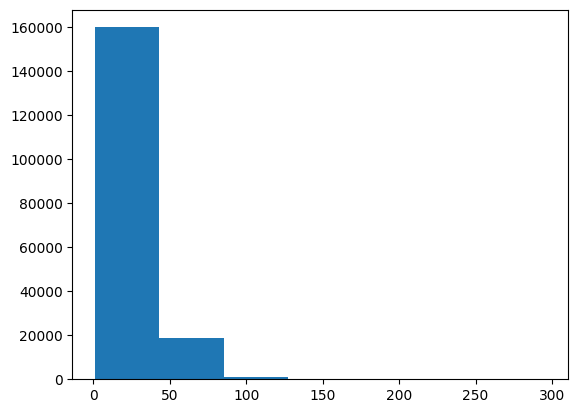

In [24]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=7);

In [25]:
max_length = int(np.percentile(sent_lens,95)) # sentence covers 95% of the length
max_length

55

In [26]:
# create text vectorizer
import tensorflow as tf

max_vocab_length = 68000

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = max_vocab_length,
                                                    standardize="lower_and_strip_punctuation",
                                                    split="whitespace",
                                                    ngrams=2,
                                                    output_mode = "int",
                                                    output_sequence_length = max_length)

In [27]:
text_vectorizer.adapt(train_text)

In [28]:
# create embedding layer

embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length,
                                      output_dim = 120,
                                      embeddings_initializer = "uniform",
                                      input_length = max_length,
                                      name = "embedding_layer")

In [29]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()

In [30]:
rct_20k_text_vocab[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

In [31]:
# tf.data API provides methods which enable faster data loading

test_text = test_df["text"]

# turn our data into tensorflow datasets

train_dataset = tf.data.Dataset.from_tensor_slices((train_text,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_text, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_text, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [32]:
# take the TensorSliceDataset and turn them into prefetched batches

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

**Model 1 : Conv1D model**

In [33]:
# create model using Functional API
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=32,kernel_size=5,padding="same",activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(5,activation="softmax")(x)

model_1 = tf.keras.Model(inputs,outputs)

In [34]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
# fit the model
history_1 = model_1.fit(train_dataset,
                        epochs = 5,
                        steps_per_epoch = int(0.1*len(train_dataset)),
                        validation_data = valid_dataset,
                        validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/5
562/562 [==============================] - 76s 133ms/step - loss: 0.3581 - accuracy: 0.5919 - val_loss: 0.2455 - val_accuracy: 0.7497
Epoch 2/5
562/562 [==============================] - 77s 136ms/step - loss: 0.2260 - accuracy: 0.7754 - val_loss: 0.2111 - val_accuracy: 0.7972
Epoch 3/5
562/562 [==============================] - 77s 137ms/step - loss: 0.2076 - accuracy: 0.7982 - val_loss: 0.2007 - val_accuracy: 0.8055
Epoch 4/5
562/562 [==============================] - 75s 133ms/step - loss: 0.1978 - accuracy: 0.8129 - val_loss: 0.1935 - val_accuracy: 0.8115
Epoch 5/5
562/562 [==============================] - 71s 126ms/step - loss: 0.1963 - accuracy: 0.8122 - val_loss: 0.1902 - val_accuracy: 0.8152


In [36]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.1881 - accuracy: 0.8207


[0.18808986246585846, 0.8207004070281982]

In [37]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 4s 4ms/step


array([[7.2893047e-01, 1.3445935e-01, 3.0961564e-02, 9.2999518e-02,
        1.2649131e-02],
       [8.1548434e-01, 1.2623225e-01, 3.2217968e-03, 5.0829735e-02,
        4.2318068e-03],
       [1.6881730e-02, 1.7682766e-04, 2.9003646e-04, 9.8264676e-01,
        4.5868533e-06],
       ...,
       [4.7772115e-08, 1.3934556e-07, 4.9022515e-07, 4.3563926e-08,
        9.9999928e-01],
       [3.2098152e-02, 8.4653765e-01, 3.5477486e-02, 2.2259522e-02,
        6.3627087e-02],
       [1.2286103e-02, 9.7772676e-01, 8.6958492e-03, 5.5467896e-04,
        7.3665456e-04]], dtype=float32)

In [38]:
# convert pred probs to classes

model_1_preds = tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [39]:
# calculate model_1 results
model_1_results = calculate_results(val_labels_encoded,model_1_preds)
model_1_results

{'accuracy': 82.0700383953396,
 'precision': 0.8200857422941992,
 'recall': 0.820700383953396,
 'f1': 0.8169960824301207}

**Model 2: Feature Extraction with pretrained token embeddings**

In [40]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")


In [41]:
# test out the embedding on a random sentence
import random

random_training_sentence = random.choice(train_text)
print('random_training sentence:',random_training_sentence)

use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print('sentence after embedding:',use_embedded_sentence[0][:20])
print("length of sentence embedding:",len(use_embedded_sentence[0]))

random_training sentence: a comprehensive continuum of care intervention comprising several components had a positive effect on frail older persons ' satisfaction with functional capacity , psychological health and financial situation .
sentence after embedding: tf.Tensor(
[-0.03426126 -0.03725238 -0.03999276  0.02457818  0.01157431  0.034409
  0.0138985   0.02840397  0.06315243  0.00575015  0.07174318 -0.04987857
  0.02189191 -0.01404148  0.00013671 -0.05173948 -0.09133112  0.07716488
 -0.03358639  0.01063805], shape=(20,), dtype=float32)
length of sentence embedding: 512


In [42]:
# creating a feature extracting model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = tf.squeeze(inputs,axis=-1) # removing the last column to get the rank 1 shape
pretrained_embedding = tf_hub_embedding_layer(x)
x = tf.keras.layers.Dense(12,activation="relu")(pretrained_embedding)

outputs = tf.keras.layers.Dense(5,activation="softmax")(x)
model_2 = tf.keras.Model(inputs,outputs)

In [43]:
# compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
# fit the model
history_2 = model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 16ms/step - loss: 1.1362 - accuracy: 0.5619 - val_loss: 0.8949 - val_accuracy: 0.6632
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 0.8414 - accuracy: 0.6728 - val_loss: 0.8140 - val_accuracy: 0.6775
Epoch 3/3
562/562 [==============================] - 9s 16ms/step - loss: 0.8078 - accuracy: 0.6879 - val_loss: 0.7968 - val_accuracy: 0.6902


In [45]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 tf.compat.v1.squeeze (TFOp  (None,)                   0         
 Lambda)                                                         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 12)                6156      
                                                                 
 dense_2 (Dense)             (None, 5)                 65        
                                                                 
Total params: 256804045 (979.63 MB)
Trainable params: 6221 

In [46]:
model_2_pred_probs = model_2.predict(val_text)
model_2_pred_probs

945/945 [==============================] - 14s 14ms/step


array([[0.37816375, 0.41486445, 0.00491892, 0.19048624, 0.01156648],
       [0.36413223, 0.47966376, 0.00678666, 0.14343302, 0.00598442],
       [0.17612503, 0.32596758, 0.02291975, 0.41833654, 0.05665108],
       ...,
       [0.00291752, 0.00736753, 0.07160444, 0.00249031, 0.91562015],
       [0.00607331, 0.04391352, 0.22112675, 0.00242336, 0.726463  ],
       [0.12877087, 0.09498108, 0.6730284 , 0.00910191, 0.09411777]],
      dtype=float32)

In [47]:
# convert from probabilities to numbers
model_2_preds = tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 2])>

In [48]:
model_2_results = calculate_results(val_labels_encoded,model_2_preds)
model_2_results

{'accuracy': 69.24731894611412,
 'precision': 0.6895974697172644,
 'recall': 0.6924731894611412,
 'f1': 0.685167279210474}

**Model 3 - Conv1D with Character Embeddings**

In [49]:
# make function to split sentences into characters

def split_chars(text):
  return " ".join(list(text))

In [50]:
# split sequence level data splits into character level data splits
train_chars = [split_chars(sentence) for sentence in train_text]
val_chars = [split_chars(sentence) for sentence in val_text]
test_chars = [split_chars(sentence) for sentence in test_text]

print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [51]:
# average character length
char_lens = [len(sentence) for sentence in train_text]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

In [52]:
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [53]:
# get all keyword characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
num_char_tokens = len(alphabet)+2

char_vectorizer = tf.keras.layers.TextVectorization(max_tokens = num_char_tokens,
                                                    output_sequence_length = output_seq_char_len,
                                                    standardize="lower_and_strip_punctuation",
                                                    name="char_vectorizer")

char_vectorizer.adapt(train_chars)

In [55]:
# embedding layer

char_embedding = tf.keras.layers.Embedding(input_dim=num_char_tokens,
                                           output_dim = 25,
                                           mask_zero=False,
                                           name="char_embed")

In [56]:
# create a model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embedding(char_vectors)
x = tf.keras.layers.Conv1D(filters=64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x = tf.keras.layers.GlobalMaxPool1D()(x)

outputs = tf.keras.layers.Dense(5,activation="softmax")(x)

model_3 = tf.keras.Model(inputs,outputs)

# compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [58]:
history_3 = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 13s 21ms/step - loss: 1.2639 - accuracy: 0.4877 - val_loss: 1.0389 - val_accuracy: 0.5881
Epoch 2/3
562/562 [==============================] - 13s 22ms/step - loss: 1.0009 - accuracy: 0.6009 - val_loss: 0.9411 - val_accuracy: 0.6353
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.9243 - accuracy: 0.6372 - val_loss: 0.8714 - val_accuracy: 0.6619


In [59]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 6s 7ms/step - loss: 0.8878 - accuracy: 0.6562


[0.887776255607605, 0.6562293171882629]

In [60]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 8s 8ms/step


array([[0.22363883, 0.33203298, 0.07877889, 0.3447128 , 0.02083641],
       [0.11149122, 0.7077807 , 0.01776816, 0.10557192, 0.05738804],
       [0.09462126, 0.14561787, 0.49193698, 0.22115111, 0.04667278],
       ...,
       [0.06056557, 0.06855119, 0.19771683, 0.06294674, 0.61021966],
       [0.05221568, 0.08867586, 0.3639653 , 0.04211157, 0.4530315 ],
       [0.27212143, 0.5868405 , 0.07098041, 0.06006544, 0.00999217]],
      dtype=float32)

In [61]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 2, ..., 4, 4, 1])>

In [62]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.62293128558188,
 'precision': 0.6437181027407146,
 'recall': 0.6562293128558189,
 'f1': 0.6441775568712851}

**Model 4 : Combining pretrained token embeddings + character embeddings**

In [63]:
# hybrid token level mode is an combination of token embedding and char embedding

# setup token inputs
token_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string,name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = tf.keras.layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_outputs)

# setup char inputs
char_inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(char_inputs,char_bi_lstm)

# concatenate token and char inputs (hybrid token embeddings)
token_char_concat = tf.keras.layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                           char_model.output])


In [65]:
# create output layers

combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(200,activation="relu")(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5,activation="softmax")(final_dropout)


In [66]:
# construct model with char and token inputs

model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [67]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

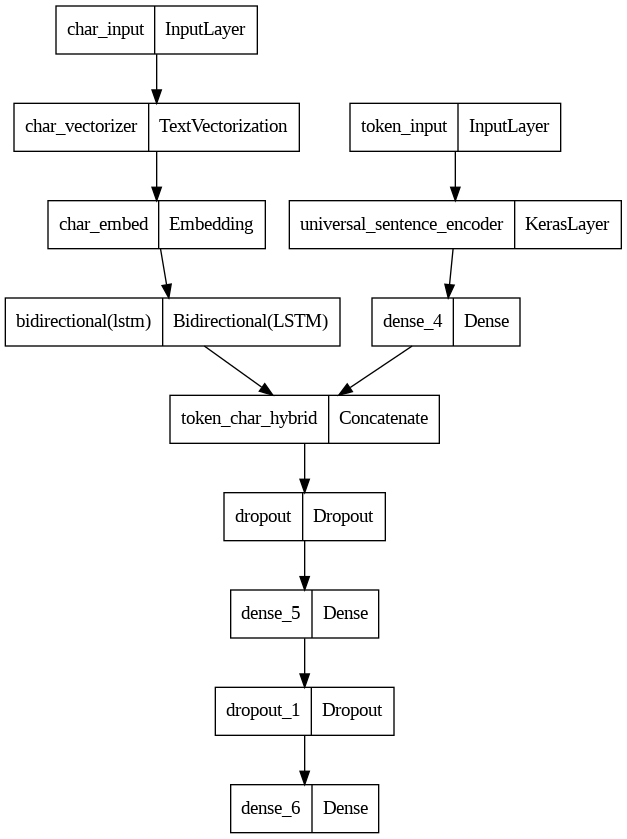

In [68]:
# plot hybrid token and character token

from tensorflow.keras.utils import plot_model

plot_model(model_4)

In [69]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [70]:
# to keep our experiment fast , we will fit our token character hybrid model on 10 percent training and validate on 10 percent
# combine token and character data into a tf.data

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_text,train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))

# prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [73]:
# combine token and char data into tf.data

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_text, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [74]:
train_char_token_dataset , val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [75]:
# Fit the model on tokens and chars
history_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 169s 285ms/step - loss: 0.9762 - accuracy: 0.6087 - val_loss: 0.7796 - val_accuracy: 0.7045
Epoch 2/3
562/562 [==============================] - 109s 195ms/step - loss: 0.7950 - accuracy: 0.6931 - val_loss: 0.7173 - val_accuracy: 0.7254
Epoch 3/3
562/562 [==============================] - 110s 197ms/step - loss: 0.7663 - accuracy: 0.7070 - val_loss: 0.6887 - val_accuracy: 0.7450


In [76]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 47s 50ms/step - loss: 0.6936 - accuracy: 0.7361


[0.6936139464378357, 0.7360982298851013]

In [77]:
# predictions

model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 49s 50ms/step


array([[4.5399529e-01, 3.0995080e-01, 2.6266272e-03, 2.2448339e-01,
        8.9439498e-03],
       [3.1707639e-01, 5.1005673e-01, 5.8071953e-03, 1.6329019e-01,
        3.7694199e-03],
       [3.2306480e-01, 1.2653552e-01, 2.8851291e-02, 4.9012044e-01,
        3.1427965e-02],
       ...,
       [4.8037051e-04, 8.9679267e-03, 4.9842041e-02, 1.6964467e-04,
        9.4054002e-01],
       [7.5878929e-03, 8.9852184e-02, 1.6544370e-01, 3.8895719e-03,
        7.3322666e-01],
       [2.3678622e-01, 4.5717475e-01, 2.2146299e-01, 3.8738910e-02,
        4.5837071e-02]], dtype=float32)

In [78]:
# turning prediction probab into prediction classes

model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [79]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.60982391102873,
 'precision': 0.7360046165819323,
 'recall': 0.7360982391102873,
 'f1': 0.7347431054090562}

In [80]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [81]:
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

In [82]:
# use tensorflow to create one hot encoded tensors of our "line number" column

train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [83]:
np.percentile(train_df.total_lines,98)

20.0

In [84]:
# use tensorflow to create one hot encoded tensors of our total_lines columns

train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)

In [90]:
# token inputs
token_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string,name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = tf.keras.layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_outputs)

# char inputs
char_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string,name="char_inputs")
char_embeddings = tf_hub_embedding_layer(char_inputs)
char_outputs = tf.keras.layers.Dense(128,activation="relu")(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_outputs)

# line number inputs
line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = tf.keras.layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = tf.keras.layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = tf.keras.layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# combine token and char embeddings
combined_embeddings = tf.keras.layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                                      char_model.output])
z = tf.keras.layers.Dense(256,activation="relu")(combined_embeddings)
z = tf.keras.layers.Dropout(0.5)(z)

# combine positional embeddings with combined token and char embeddings

z = tf.keras.layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,total_line_model.output,z])

# create output layer
output_layer = tf.keras.layers.Dense(5,activation="softmax",name="output_layer")(z)

# create a model
model_5 = tf.keras.Model(inputs=[line_number_model.input,total_line_model.input,
                                 token_model.input,char_model.input],
                         outputs = output_layer)

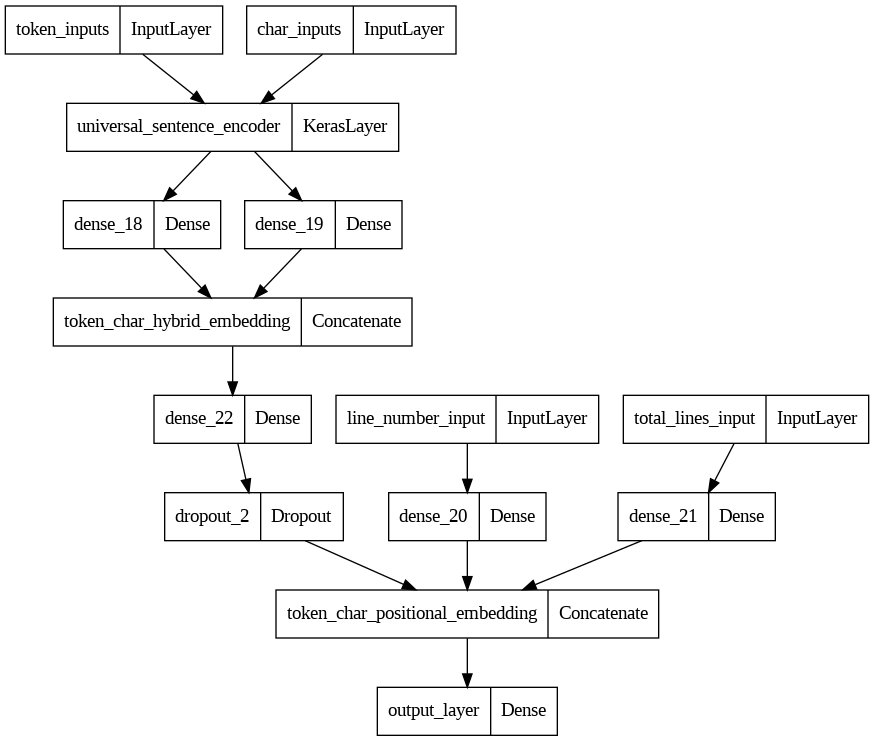

In [91]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [92]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [93]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_text, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_text,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [95]:
# Fit the token, char and positional embedding model
history_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 27s 47ms/step - loss: 1.0346 - accuracy: 0.7710 - val_loss: 0.9793 - val_accuracy: 0.7965
Epoch 2/3
562/562 [==============================] - 34s 61ms/step - loss: 0.9678 - accuracy: 0.8140 - val_loss: 0.9540 - val_accuracy: 0.8225
Epoch 3/3
562/562 [==============================] - 23s 40ms/step - loss: 0.9530 - accuracy: 0.8206 - val_loss: 0.9456 - val_accuracy: 0.8225


In [96]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 30s 31ms/step


array([[0.4634435 , 0.12496413, 0.01353541, 0.37592137, 0.0221356 ],
       [0.52294165, 0.13862701, 0.03366403, 0.29373258, 0.0110348 ],
       [0.21990119, 0.11447307, 0.13199429, 0.4661135 , 0.06751791],
       ...,
       [0.02706006, 0.09198841, 0.04153951, 0.02833204, 0.81108004],
       [0.03004093, 0.28679952, 0.07510913, 0.02821848, 0.5798319 ],
       [0.12403777, 0.6912496 , 0.08429395, 0.0318722 , 0.06854642]],
      dtype=float32)

In [97]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [98]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 82.7386468952734,
 'precision': 0.8261997074501333,
 'recall': 0.827386468952734,
 'f1': 0.826652796732399}

**Compare Model Results**

In [99]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,82.070038,0.820086,0.820700,0.816996
pretrained_token_embed,69.247319,0.689597,0.692473,0.685167
custom_char_embed_conv1d,65.622931,0.643718,0.656229,0.644178
hybrid_char_token_embed,73.609824,0.736005,0.736098,0.734743
tribrid_pos_char_token_embed,82.738647,0.826200,0.827386,0.826653


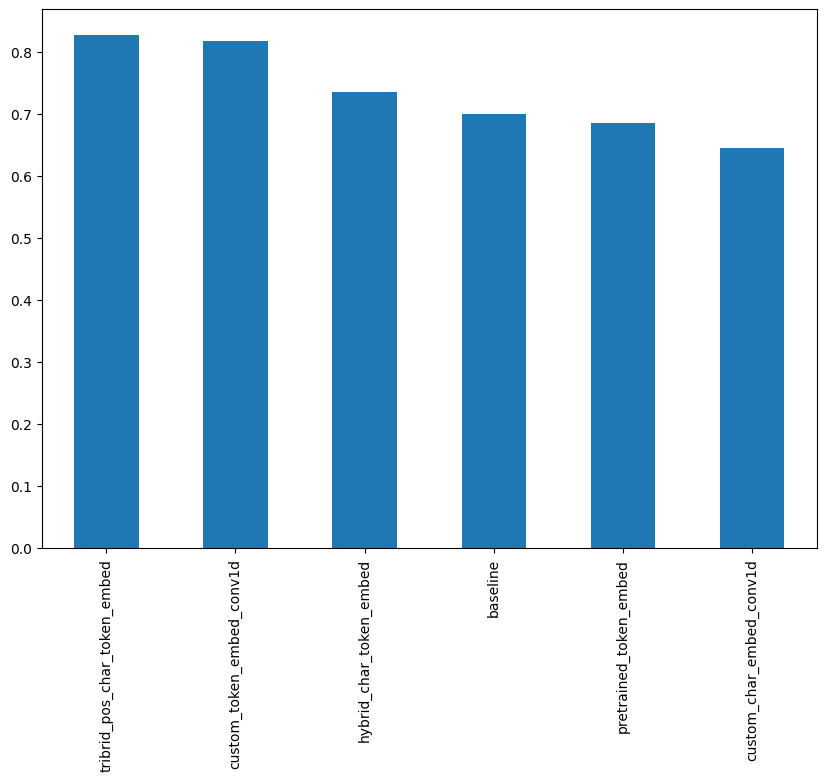

In [100]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [101]:
# save the model

model_5.save("skimlit_tribrid_model")

**Evaluating our model**

In [102]:
# create test dataset

test_dataset_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                          test_total_lines_one_hot,
                                                          test_text,
                                                          test_chars))
test_dataset_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_dataset_token_data,test_dataset_token_labels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [105]:
# Make predictions on the test dataset
test_pred_probs = model_5.predict(test_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 36s 38ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 1, 0])>

In [106]:
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.22332835573253,
 'precision': 0.8212931411362412,
 'recall': 0.8222332835573254,
 'f1': 0.8215097152643885}